# Exercise 3

# Parameters discussion
### Simulation time and integration timestep
The typical radia and velocities of the problem in the new coordinate system are of the order $1$. Hence, if a planet has a stationary orbit, we would expect its frequency to be around $f = \frac{v}{2\pi r}$, hence the period to be around $T_{orb} \approx 1/f \approx 2\pi \frac{r}{v} \approx 2\pi$. If we want to see a few orbits we can fix the simulation time to be around $T \approx 10$. The simulation timestep is then chosen to give a good accuracy within a reasonable simulation duration. We can set $dt = 5 \cdot 10^{-3}$.  
This is a reasonable starting point. Then the parameters are fine-tuned for each problem modifying slightly those given above.
### Softening length
In order to avoid divergenses in the energy calculation and violate the collisionless hypothesis (see lecture notes) we added a softening length in the potential
$$m_{i} \frac{d \vec{v}_{i}}{d t}= m_{i} \sum_{k \neq i} m_{k} \frac{\vec{x}_{k}-\vec{x}_{i}}{\left|\vec{x}_{k}-\vec{x}_{i}\right|^{3}+\varepsilon^{3}}$$
In order to fix the value of the softening length, we followed the following reasoning.  
The average orbit radius of the particles, at least before they get scattered, is roughly 1. Hence all the particles lie in a sphere of volume $V = \frac{4}{3} \pi R^3 \approx 5$.  
Hence we expect that, on average, each particle has a free volume in the surrounding of approximately $V/N \approx 5/N$. We can fix the softening volume to be $1/1000$ of this value, so that the softening length becomes 
$$\epsilon \approx \left(\frac{V}{1000 \, N}\right)^{1/3} \approx (5/N)^{1/3} \approx 2 \, N^{-1/3}$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [2]:
def generate_ICs(N):
    """Generates random initial positions and velocities for N bodies"""
    
    X0 = []
    V0 = []
    while len(X0)<N:
        x = np.random.uniform(-1,1,size=3)
        if np.linalg.norm(x)<=1:
            X0.append(x)
        
    while len(V0)<N:
        x = np.random.uniform(-0.1,0.1,size=3)
        if np.linalg.norm(x)<=0.1:
            V0.append(x)
        
    X0 = np.array(X0)
    V0 = np.array(V0)

    return X0, V0

In [3]:
# leap frog N body algorithm

def leapfrogN(M, X0, V0, Nt, dt, acc, eps):
    """M: array with mass values; X0 & V0: Nx3 arrays with initial
    conditions of positions and velocities; Nt: number of time steps; dt: 
    time step size; acc: function that evaluates and gives back Nx3 array
    with accelerations for given positions and masses"""
    N = np.shape(M)[0]
    t = np.arange(0,dt*Nt,dt)
    X = np.zeros((N,3,Nt))
    V = np.zeros((N,3,Nt))
    
    X[:,:,0] = X0
    V[:,:,0] = V0
    
    for i in range(Nt-1):
        if i%100==0:
            #print(t[i])
            pass
        vhalf = V[:,:,i] + acc(M,X[:,:,i], eps)*dt/2
        X[:,:,i+1] = X[:,:,i] + vhalf*dt
        V[:,:,i+1] = vhalf + acc(M,X[:,:,i+1], eps)*dt/2
    
    return t, X, V
    
    

In [4]:
# RHS of dv/dt aka acceleration
def newton_acc(M, X, eps):
    
    N = np.shape(M)[0]
    A = np.zeros((N,3))
    
    for i in range(N):
        for j in range(N):
            if i==j:
                continue
            A[i,:] += M[j]*(X[j,:] - X[i,:])/((np.linalg.norm(X[j,:] - X[i,:]))**3 + eps**3)
    
    return A

In [5]:
def calculate_energy(M,X,V):
    E = 0
    for i in range(len(M)):
        E += M[i]*np.linalg.norm(V[i,:])**2/2
        for j in range(i+1, len(M)):
            E += -M[i]*M[j]/np.linalg.norm(X[i,:]-X[j,:])
    
    return E

## 3.1

Simulation with 30 stars

Simulation time = 2.816358568999931 seconds


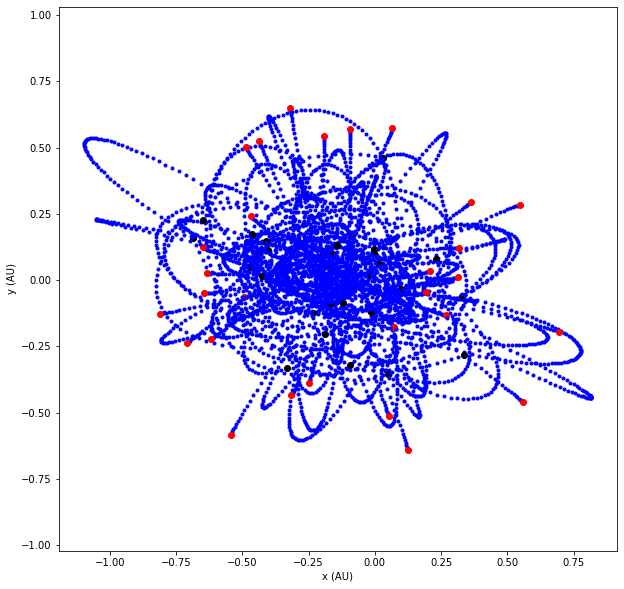

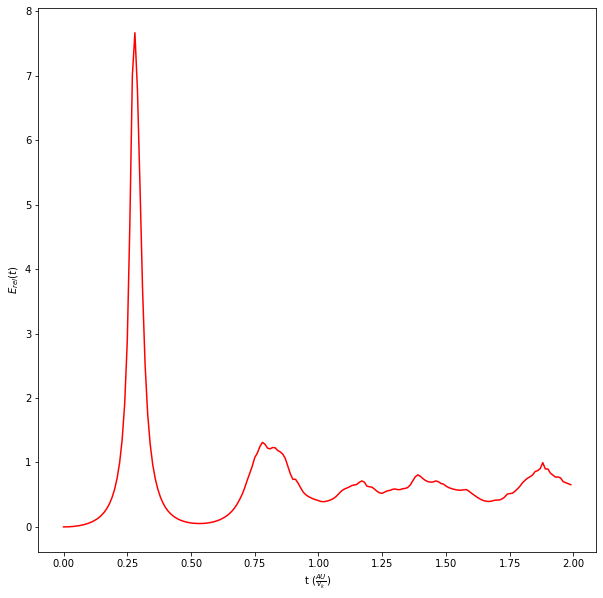

Simulation time = 2.8929267849998723 seconds


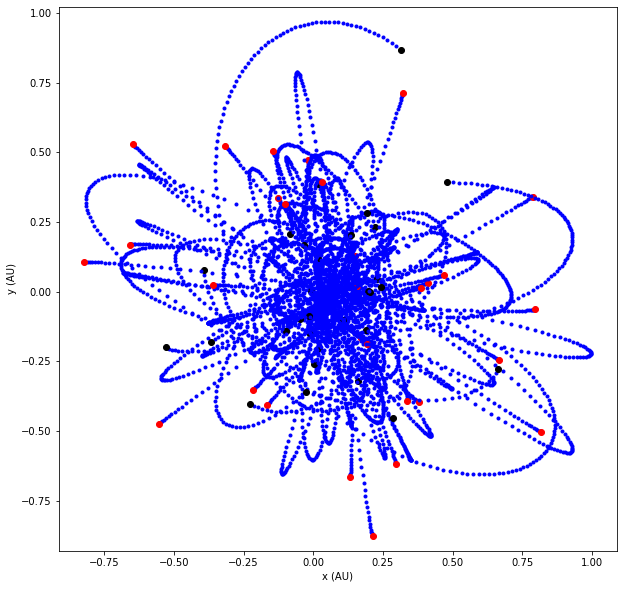

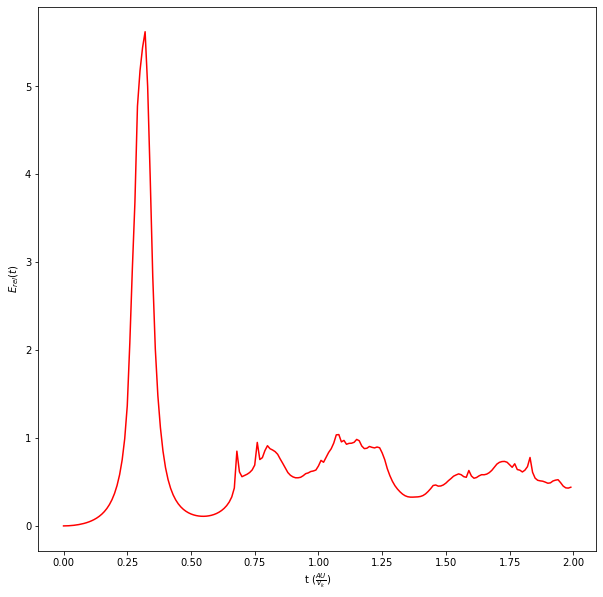

Simulation time = 2.9419535400002133 seconds


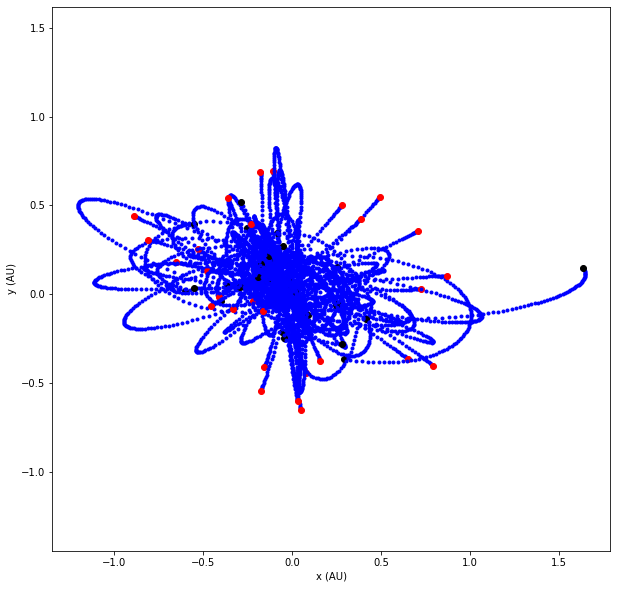

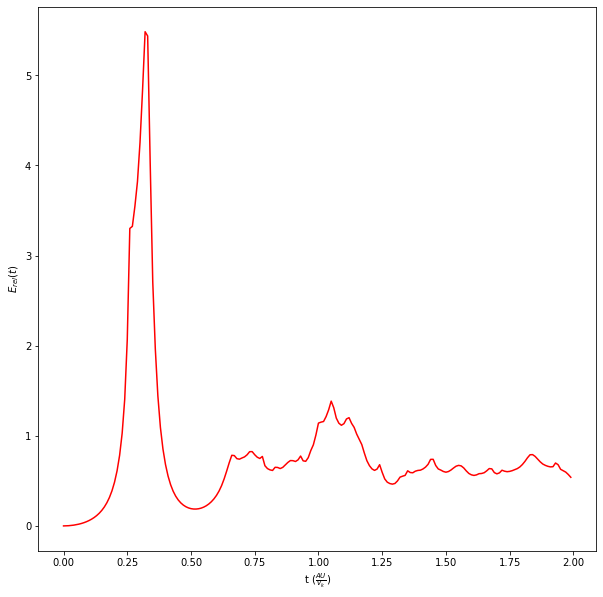

Simulation time = 2.947166731999914 seconds


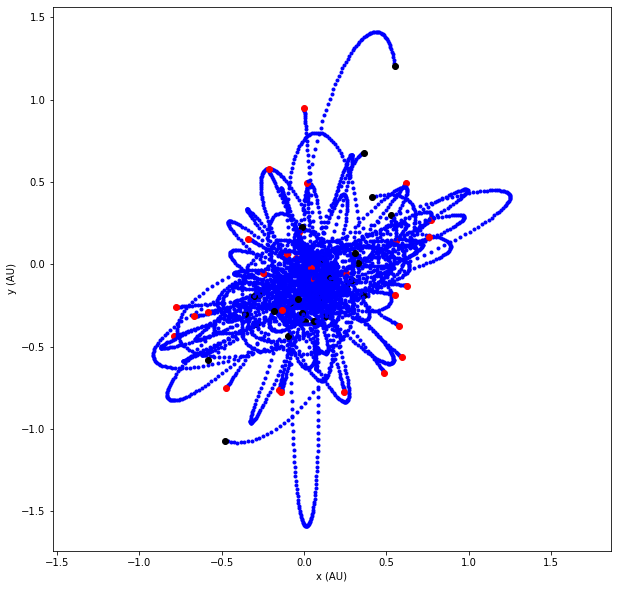

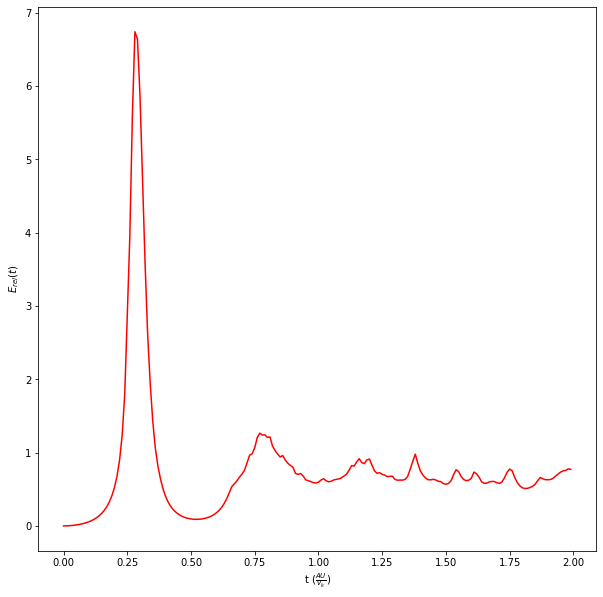

Simulation time = 2.8855199089998678 seconds


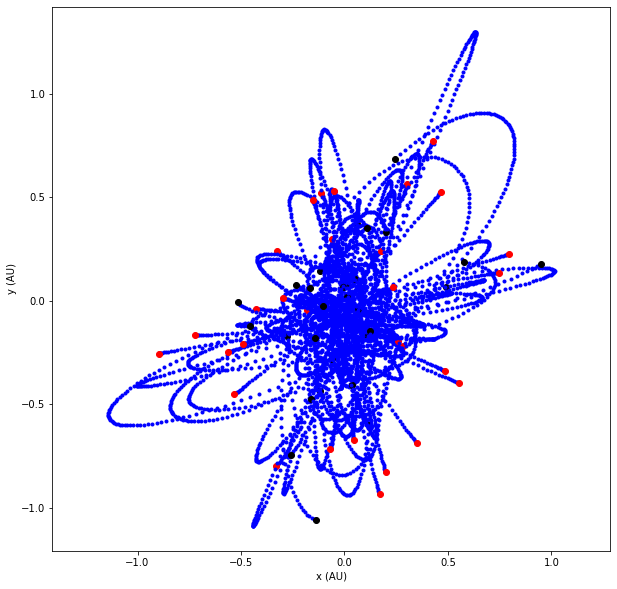

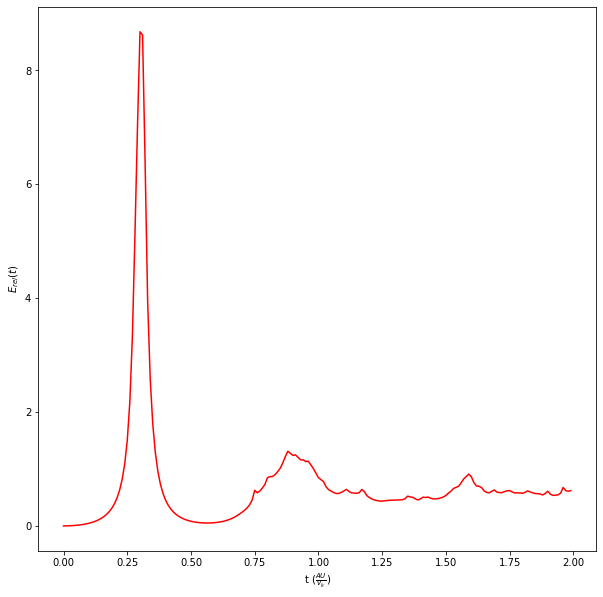

In [21]:

N = 30 # Number of stars
p = 1 # Mass of stars

dt = 1e-2
T = 2
Nt = int(T/dt)
eps = N**(-1/3) * 2

for _ in range(5):
    
    X0, V0 = generate_ICs(N)
    M = np.ones(N)*p

    start = timeit.default_timer()
    t, X, V = leapfrogN(M, X0, V0, Nt, dt, newton_acc, eps)
    stop = timeit.default_timer()

    print(f'Simulation time = {stop - start} seconds')

    fig = plt.figure(figsize=(10,10))
    for i in range(N):
        plt.plot(X[i,0,:],X[i,1,:], 'b.')
        plt.plot(X[i,0,0],X[i,1,0],'ro')
        plt.plot(X[i,0,-1],X[i,1,-1],'ko')
    #plt.legend(['Star 1','Star 2'], loc='upper left')
    plt.xlabel('x (AU)'); plt.ylabel('y (AU)')
    plt.axis('equal')
    plt.show()

    E_rel = []
    for i in range(Nt):
        E_rel.append((calculate_energy(M,X[:,:,i],V[:,:,i])-calculate_energy(M,X0,V0))/calculate_energy(M,X0,V0))
                 

    fig1 = plt.figure(figsize=(10,10))
    plt.plot(t,E_rel,'r-')
    plt.xlabel(r't ($\frac{AU}{v_k}$)')
    plt.ylabel(r'$E_{rel}(t)$')
    plt.show()

## 3.2

Simulation time = 292.95507051799996 seconds


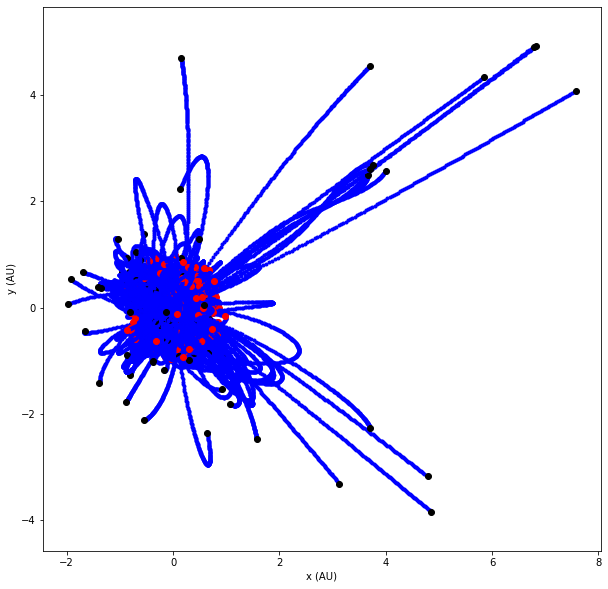

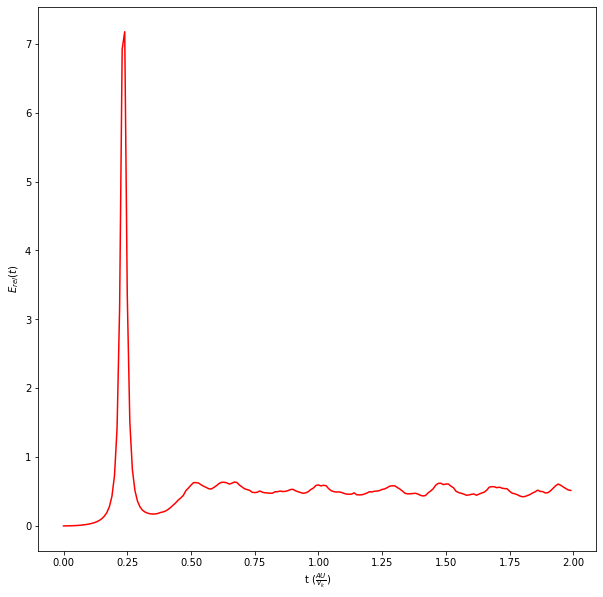

In [23]:
N = 300 # Number of stars
p = 0.1 # Mass of stars
eps = N**(-1/3) * 2

X0, V0 = generate_ICs(N)
M = np.ones(N)*p

dt = 1e-2
T = 2
Nt = int(T/dt)

start = timeit.default_timer()
t, X, V = leapfrogN(M, X0, V0, Nt, dt, newton_acc, eps)
stop = timeit.default_timer()

print(f'Simulation time = {stop - start} seconds')

fig = plt.figure(figsize=(10,10))
for i in range(N):
    plt.plot(X[i,0,:],X[i,1,:], 'b.')
    plt.plot(X[i,0,0],X[i,1,0],'ro')
    plt.plot(X[i,0,-1],X[i,1,-1],'ko')
#plt.legend(['Star 1','Star 2'], loc='upper left')
plt.xlabel('x (AU)'); plt.ylabel('y (AU)')
plt.axis('equal')
plt.show()

E_rel = []
for i in range(Nt):
    E_rel.append((calculate_energy(M,X[:,:,i],V[:,:,i])-calculate_energy(M,X0,V0))/calculate_energy(M,X0,V0))

fig1 = plt.figure(figsize=(10,10))
plt.plot(t,E_rel,'r-')
plt.xlabel(r't ($\frac{AU}{v_k}$)')
plt.ylabel(r'$E_{rel}(t)$')
plt.show()

The simulation with $30$ bodies, $dt=1e-2, T=1$ takes around $2.9 \ \text{s}$ to be run. The one with $N=300$ takes about $292 \ \text{s}$. To understand this, let us look at the leapfrog cycle.  
In each cyle one should evaluate the force on each body: this is done by making two nested for cycles. Hence, at leading order for large $N$, the time to run each leapfrog cycle is proportional to $N^2$, with a proportionality coefficient that depends on the implementation. In formulas $$t_{run} \propto N^2$$
Hence
$$\frac{t'}{t} = \left(\frac{N'}{N}\right)^2$$
In our case $\frac{N'}{N} = 10$ and $\text{t} \approx 2.9 \ \text{s}$ , hence $t' \approx 290 \ \text{s}$

In [19]:
# close encounter checker:

def leapfrogN_close_encounter(M, X0, V0, Nt, dt, acc, enc_lim, eps):
    """M: array with mass values; X0 & V0: Nx3 arrays with initial
    conditions of positions and velocities; Nt: number of time steps; dt: 
    time step size; acc: function that evaluates and gives back Nx3 array
    with accelerations for given positions and masses"""
    N = np.shape(M)[0]
    t = np.arange(0,dt*Nt,dt)
    X = np.zeros((N,3,Nt))
    V = np.zeros((N,3,Nt))
    
    X[:,:,0] = X0
    V[:,:,0] = V0
    
    reduced_dt = False
    for i in range(Nt-1):
        flag_close_encounter = False
        for j in range(N):
            for k in range(j+1,N):
                if np.linalg.norm(X[j,:,i] - X[k,:,i]) < enc_lim:
                    flag_close_encounter = True
                    if not reduced_dt:
                        dt /= 15
                        reduced_dt = True
                        print("Planet", j , "says there's planet", k, "in the neighbourhood! New dt =", dt)
                    #Nt = int((T-2*dt*Nt)/dt)
                    Nt = int(T/dt)
                    break
        if flag_close_encounter == False and reduced_dt == True:
            dt *= 10
            reduced_dt = False
            print("No near planets. New dt =", dt)

        if i%100==0:
            #print(t[i])
            pass
        vhalf = V[:,:,i] + acc(M,X[:,:,i], eps)*dt/2
        X[:,:,i+1] = X[:,:,i] + vhalf*dt
        V[:,:,i+1] = vhalf + acc(M,X[:,:,i+1], eps)*dt/2
    
    return dt, t, X, V
    



Planet 27 says there's planet 29 in the neighbourhood! New dt = 0.0006666666666666666
No near planets. New dt = 0.006666666666666666
Planet 3 says there's planet 9 in the neighbourhood! New dt = 0.0004444444444444444
No near planets. New dt = 0.0044444444444444444
Planet 8 says there's planet 24 in the neighbourhood! New dt = 0.0002962962962962963
Time step at the end: 0.0002962962962962963
Simulation time = 3.3033373849998497 seconds


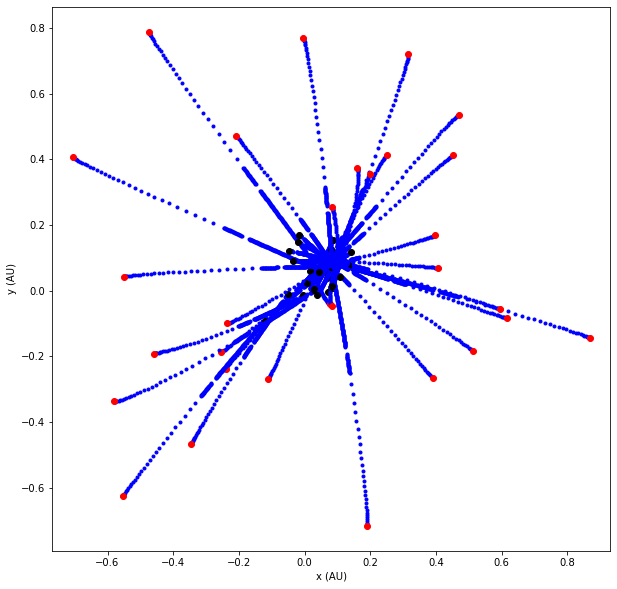

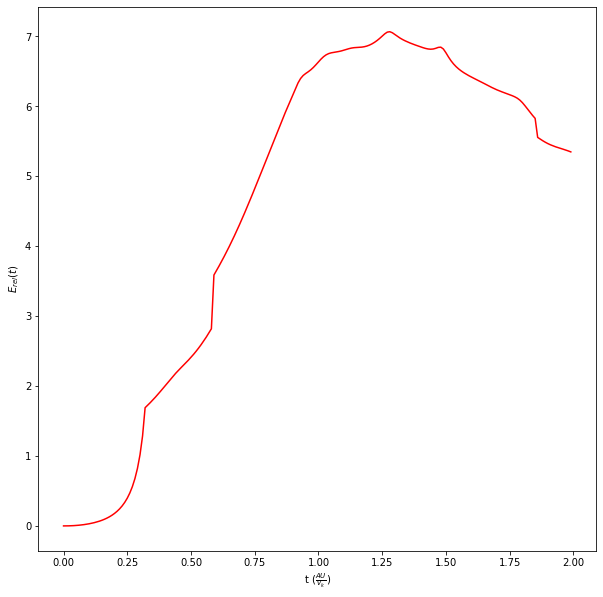

In [22]:
N = 30 # Number of stars
p = 0.5 # Mass of stars
eps = N**(-1/3) * 2

X0, V0 = generate_ICs(N)
M = np.ones(N)*p
enc_lim = 2*1e-2 # distance between two stars that triggers "close encounter checker"

dt = 1e-2
T = 2
Nt = int(T/dt)

start = timeit.default_timer()
dt, t, X, V = leapfrogN_close_encounter(M, X0, V0, Nt, dt, newton_acc, enc_lim, eps)
stop = timeit.default_timer()

print(f'Time step at the end: {dt}')
print(f'Simulation time = {stop - start} seconds')

fig = plt.figure(figsize=(10,10))
for i in range(N):
    plt.plot(X[i,0,:],X[i,1,:], 'b.')
    plt.plot(X[i,0,0],X[i,1,0],'ro')
    plt.plot(X[i,0,-1],X[i,1,-1],'ko')

plt.xlabel('x (AU)'); plt.ylabel('y (AU)')
plt.axis('equal')
plt.show()

E_rel = []
for i in range(Nt):
    E_rel.append((calculate_energy(M,X[:,:,i],V[:,:,i])-calculate_energy(M,X0,V0))/calculate_energy(M,X0,V0))
                
fig1 = plt.figure(figsize=(10,10))
plt.plot(t,E_rel,'r-')
plt.xlabel(r't ($\frac{AU}{v_k}$)')
plt.ylabel(r'$E_{rel}(t)$')
plt.show()